In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/loan_approval_dataset.csv")

In [188]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [190]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [191]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [192]:
df[df.duplicated()]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


EDA

Text(0.5, 1.0, 'Number of Dependents')

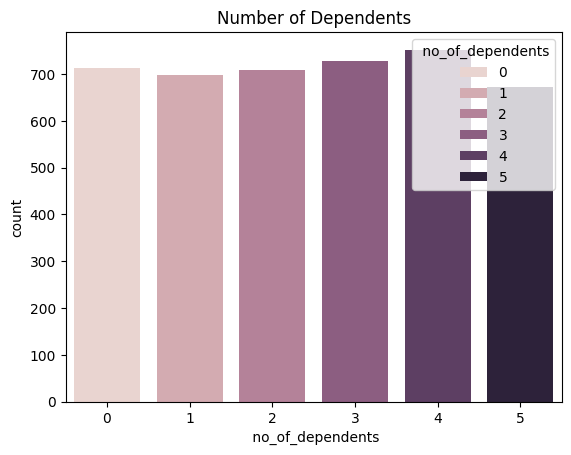

In [193]:
import seaborn as sns
sns.countplot(x = ' no_of_dependents', hue = " no_of_dependents",data = df).set_title('Number of Dependents')

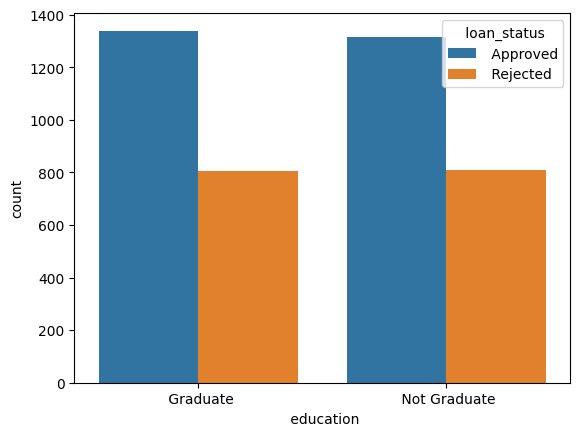

In [194]:
import matplotlib.pyplot as plt
sns.countplot(data=df, x=" education", hue=" loan_status")
plt.show()

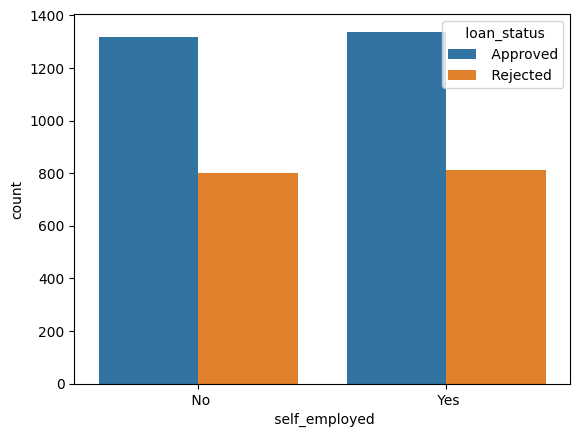

In [195]:
sns.countplot(data=df, x=" self_employed", hue=" loan_status")
plt.show()

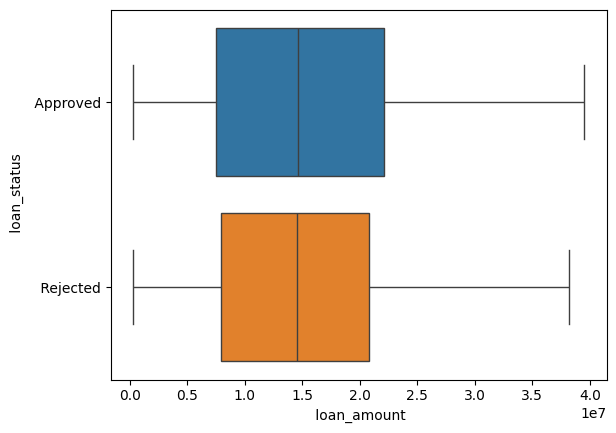

In [196]:
sns.boxplot(data=df, x=" loan_amount", y=" loan_status",hue=" loan_status")
plt.show()

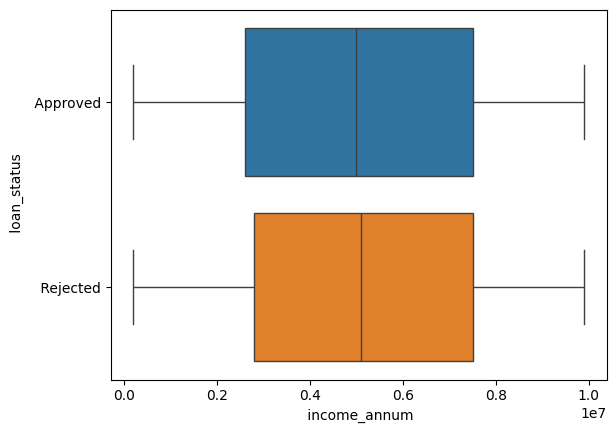

In [197]:
sns.boxplot(data=df, x=" income_annum", y=" loan_status",hue=" loan_status")
plt.show()

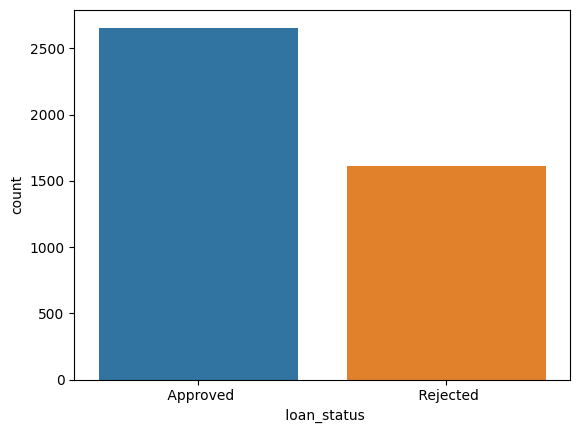

In [198]:
sns.countplot(data=df, x=" loan_status",hue=" loan_status")
plt.show()

Converting Categorical Data into Numerical Data

In [199]:
df[' education'] = df[' education'].map({" Graduate" : 1, " Not Graduate" : 0})
df[' self_employed'] = df[' self_employed'].map({" Yes" : 1, " No" : 0})
df[' loan_status'] = df[' loan_status'].map({" Approved" : 1, " Rejected" : 0})

In [200]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [201]:
df = df.drop('loan_id',axis=1)

Splitting into X - Input Features and y - Output Features

In [202]:
X = df.drop(columns=[' loan_status'])
y = df[' loan_status']

Splitting into Train and Test Datasets

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

Feature Scaling

In [204]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [205]:
names=[]
scores=[]

Random Forest Classifier

In [206]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
rfc = RandomForestClassifier( n_estimators=100)
rfc.fit(X_train,y_train)
pred2=rfc.predict(X_test)
print("Classification Report:")
print(classification_report(y_test,pred2))
print("Accuracy Score:",accuracy_score(y_test,pred2))
names.append("RFC")
scores.append(accuracy_score(y_test,pred2))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       474
           1       0.99      0.98      0.98       807

    accuracy                           0.98      1281
   macro avg       0.97      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281

Accuracy Score: 0.9781420765027322


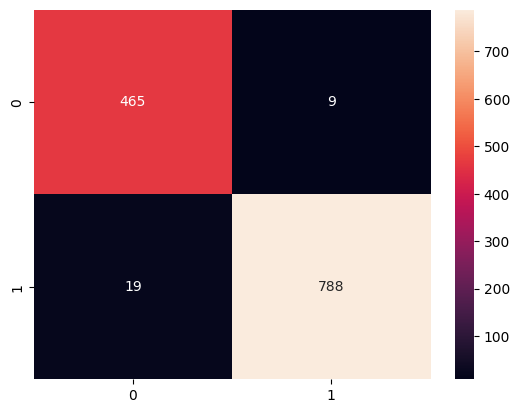

In [207]:
cm = confusion_matrix(y_test, pred2)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

Naive Bayes

In [208]:
from sklearn.naive_bayes import GaussianNB
algo = GaussianNB()
algo.fit(X_train,y_train)
y_pred = algo.predict(X_test)
y_pred
print("Classification Report:")
print(classification_report(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))
names.append("NB")
scores.append(accuracy_score(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       474
           1       0.95      0.94      0.94       807

    accuracy                           0.93      1281
   macro avg       0.92      0.93      0.93      1281
weighted avg       0.93      0.93      0.93      1281

Accuracy Score: 0.9305230288836847


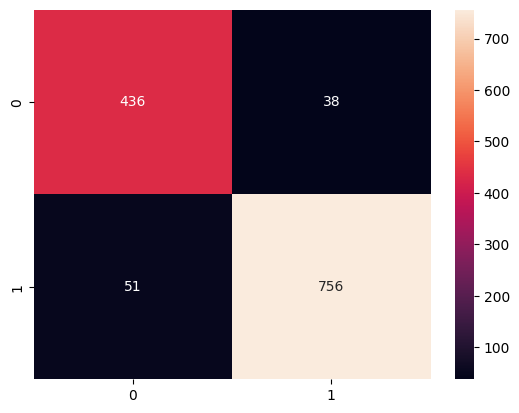

In [209]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

Logistic Regression

In [210]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred3=lr.predict(X_test)
print("Classification Report:")
print(classification_report(y_test,pred3))
print("Accuracy Score:",accuracy_score(y_test,pred3))
names.append("LR")
scores.append(accuracy_score(y_test,pred3))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       474
           1       0.93      0.94      0.93       807

    accuracy                           0.91      1281
   macro avg       0.91      0.91      0.91      1281
weighted avg       0.91      0.91      0.91      1281

Accuracy Score: 0.9141295862607338


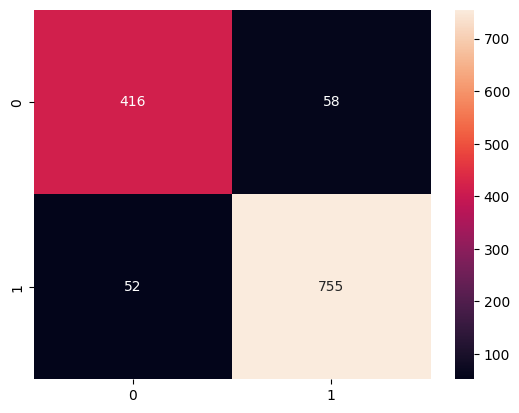

In [211]:
cm = confusion_matrix(y_test, pred3)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

K Nearest Neighbors

In [212]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))
names.append("KNN")
scores.append(accuracy_score(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       474
           1       0.91      0.90      0.91       807

    accuracy                           0.89      1281
   macro avg       0.88      0.88      0.88      1281
weighted avg       0.89      0.89      0.89      1281

Accuracy Score: 0.8860265417642467


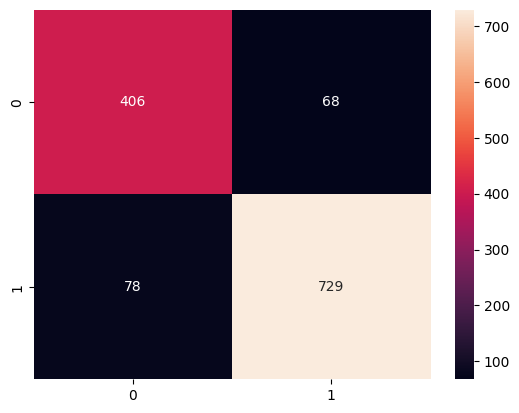

In [213]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

XG Boost

In [214]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print("Classification Report:")
print(classification_report(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))
names.append("XGBoost")
scores.append(accuracy_score(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       474
           1       0.99      0.99      0.99       807

    accuracy                           0.99      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.99      0.99      0.99      1281

Accuracy Score: 0.9859484777517564


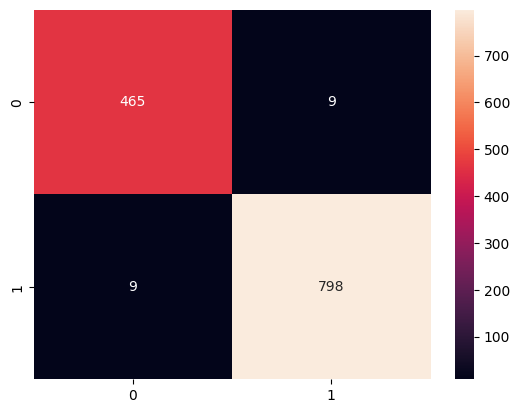

In [215]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

Comparing Algorithms based on Accuracy

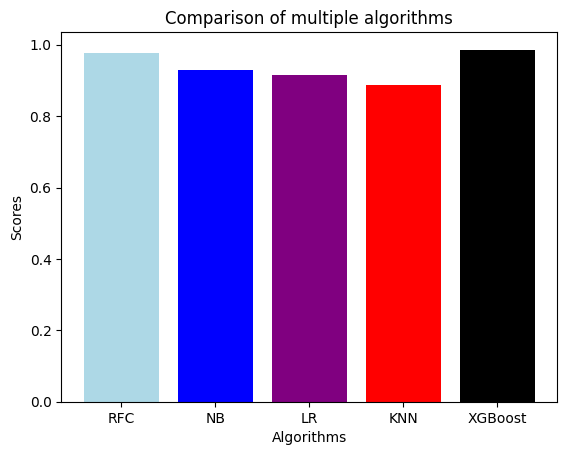

In [216]:
color = ['lightblue', 'blue', 'purple', 'red', 'black']
plt.bar(names, scores,color = color)
plt.xlabel("Algorithms")
plt.ylabel("Scores")
plt.title("Comparison of multiple algorithms")
plt.show()

KFold Cross Validation

In [217]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
models=[]
models.append(('RFC',RandomForestClassifier()))
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('XG',XGBClassifier()))


results=[]
names=[]

for name,model in models:
  kfold = KFold(n_splits=7,shuffle=True)
  cv_results =cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
  print(msg)

RFC: 0.976908 (0.004229)
LR: 0.919677 (0.010903)
KNN: 0.893572 (0.019359)
NB: 0.933403 (0.014580)
XG: 0.981257 (0.007619)


Packing the Model

In [218]:
import pickle as pkl

In [219]:
pkl.dump(model, open('model.pkl', 'wb'))